---
title: "Visualização de Dados"
author: "Gustavo J. V. Meira Filho"
format:
    pdf:
        documentclass: scrreprt
        pdf-engine: xelatex
        toc: true
        toc-depth: 3
        include-in-header: 
            text: |
                \usepackage[a4paper,margin=2.5cm]{geometry}
        execute:
            echo: true     
            warning: false   
            message: false 
    html:
        code-fold: true
        code-summary: "Show Code"
        toc: true
        toc-depth: 3
execute:
    fig-format: png       
jupyter: AIChE-Internal-Challenges
---

\newpage
# **Objetivo**

> Introduzir Python, manipulação de dados e visualização.

* <span style="color: #3d9be7ff"><strong>Conceitos de programação:</strong></span> 
  * Tipos básicos (`int`, `float`, `str`, `list`, `dict`)
  * Loops
  * Funções simples.
* <span style="color: #3d9be7ff"><strong>Bibliotecas:</strong></span>  
  * `pandas` (dados tabulares) 
  * `plotly` (visualização gráfica - pode substituir pelo `matplotlib`).
* <span style="color: #3d9be7ff"><strong>Aplicações:</strong></span> 

  * Importar uma base de dados da tabela periódica (existe em CSV no Kaggle).
  * Explorar propriedades como massa atômica, eletronegatividade, número atômico.
  * Criar gráficos (ex.: massa atômica vs número atômico; cores por família).

\newpage
# Bibliotecas e Importações

In [1]:
# Nativas Python
import sys
import os

# Dados Tabulares
import pandas as pd
import numpy as np

# Visualização
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
from graphmodex import plotlymodex

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Imagem png ou interativa (notebook)
pio.renderers.default = 'png'

\newpage

# **Pandas**

## Extração

Precisamos extrair a base de dados para conseguir trabalhar em cima dela! Para conseguirmos visualizar e manipular os dados, armazenamos ela como um objeto `pandas` que já possui tratamentos internos para vatorização e é a biblioteca coringa para todas as libs de visualização.

* [Começando na Biblioteca](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)
* [Guia do Usuário](https://pandas.pydata.org/docs/user_guide/index.html)
* [Documentação](https://pandas.pydata.org/docs/reference/index.html)

Note que a tabela periódica é um `.csv` na pasta `data`. Vamos armazenar esses dados em uma DataFrame chamada `df`

In [3]:
tabela_periodica = pd.read_csv(r'..\data\elementdatavalues.csv')

tabela_periodica = tabela_periodica[[
    'Name', 'Symbol', 'Atomic_Number', 'Atomic_Weight', 
    'Density', 'Melting_Point', 'Group', 'Period', 'Boiling_Point'
]]

tabela_periodica['Melting_Point'] = round(
    tabela_periodica['Melting_Point'] - 273.15, 2)
tabela_periodica['Boiling_Point'] = round(
    tabela_periodica['Boiling_Point'] - 273.15, 2)

In [4]:
equipamentos = pd.read_csv(r'..\data\equipamentos.csv')

# **Visualização de Dados**

## Dispersão

Gráficos de dispersão sáo ótimos para visualizações de padrões, séries temporais, correlações e regressões!

A minha recomendação, no geral, sempre está voltada para a biblioteca `plotly.graph_objects` (ou `go`), uma vez que é a versão de baixo nível high code (mais customizável) do `plotly.express`. Ela tem um racional simples por trás de sua estrutura, além de um suporte inerativo.

In [83]:
# px.colors.sequential.swatches_continuous()

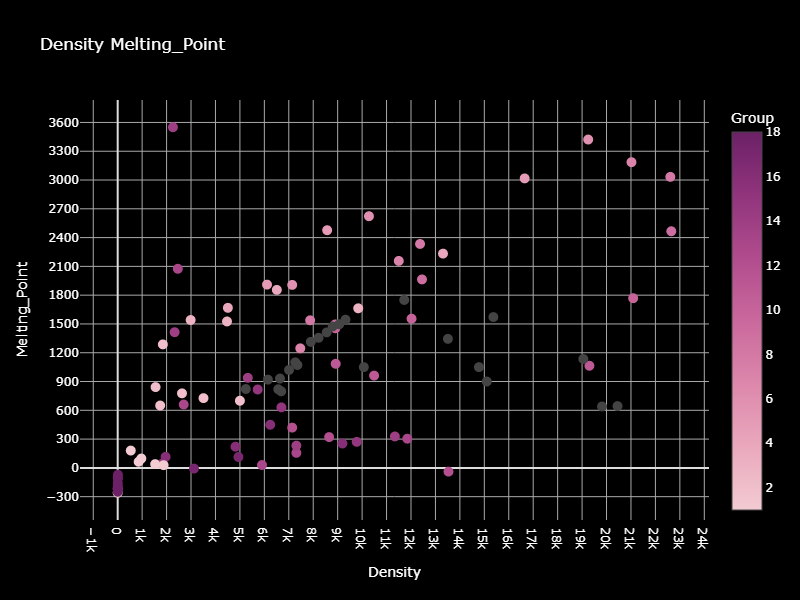

In [82]:
x='Density'
y='Melting_Point'

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=tabela_periodica[x], y=tabela_periodica[y],
    mode='markers', showlegend=False,
    marker=dict(
        color=tabela_periodica.Group, size=10,
        colorscale='Magenta',
        showscale=True, 
        colorbar=dict(
            title=dict(text='Group', font=dict(color='white')),
            tickfont=dict(color='white'),
            bgcolor='black'
        )
    )
))

fig.update_layout(
    plot_bgcolor='black',
    xaxis={'title': x, 'zerolinecolor': '#DDDDDD', 'gridcolor': '#AAAAAA', 'dtick': 1000, 'color': 'white'},
    yaxis={'title': y, 'zerolinecolor': '#DDDDDD', 'gridcolor': "#AAAAAA", 'dtick': 300, 'color': 'white'},
    title={'text': x+' '+y, 'font':{'color': 'white'}},
    width=800, 
    height=600,
    paper_bgcolor='black'
)

Podemos usar a biblioteca `plotly.express` (`px`) para criar frames interativos (não disponíveis em .png).

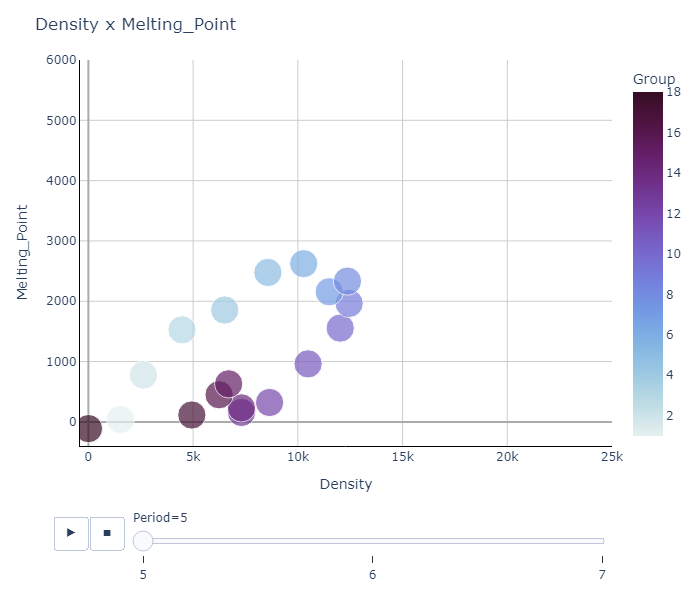

In [6]:
fig = px.scatter(
    tabela_periodica.query("Period >= 5").sort_values(y), 
    x=x, y=y, color='Group',
    color_continuous_scale='dense', animation_frame='Period',
    range_x=[-400, 25000], range_y=[-400, 6000], 
    size=[5]*len(tabela_periodica.query("Period >= 5")),
)
fig

plotlymodex.main_layout(
    fig, x=x, y=y, title=x+' x '+y, 
    x_range=[-400, 25000], y_range=[-400, 6000],
)

O `matplotlib` fornece um suporte em .png para criar gráficos dos mais variados estilos! Ele é altamente customizável e possui uma vasta gama de exemplos na internet. Das bibliotecas, ele é o mais antigo e consolidado.

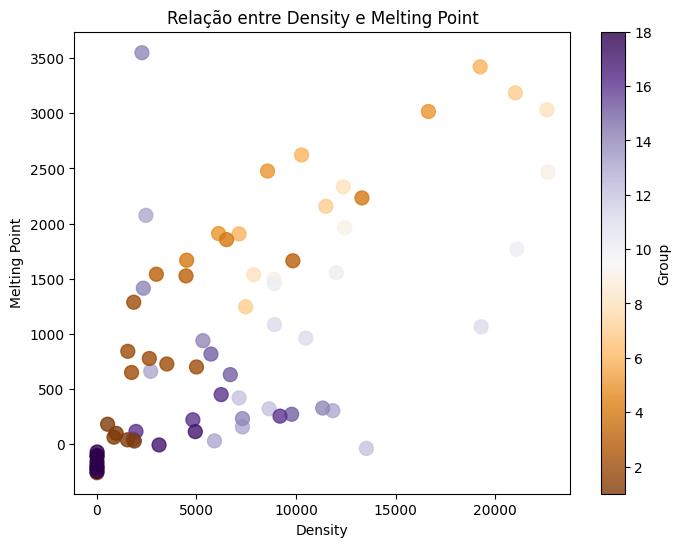

In [7]:
plt.figure(figsize=(8, 6))

# Criar o scatter plot
scatter = plt.scatter(
    tabela_periodica[x],
    tabela_periodica[y],
    c=tabela_periodica['Group'],  # cor por grupo
    s=100,                # tamanho dos pontos
    cmap='PuOr',           # colormap opcional
    alpha=0.8
)

# Adicionar rótulos e título
plt.xlabel('Density')
plt.ylabel('Melting Point')
plt.title('Relação entre Density e Melting Point')

# Adicionar barra de cores (legenda para o "Group")
plt.colorbar(scatter, label='Group')

plt.show()

O `sns` possui um suportemenor para alguns tipos de gráficos, mas para estatísticos ele é uma das melhores bibliotecas. Mesmo assim, ele consegue suprir algumas necessidades!

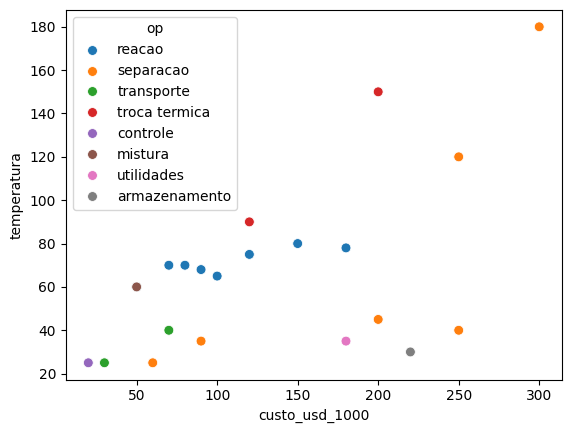

In [8]:
sns.scatterplot(
    data=equipamentos, x='custo_usd_1000', 
    y='temperatura', s=50, hue='op'
);

Usar o `px` é uma forma mais rápida e simples de criar gráficos interativos, mas com menos customização. Veja o exemplo abaixo:

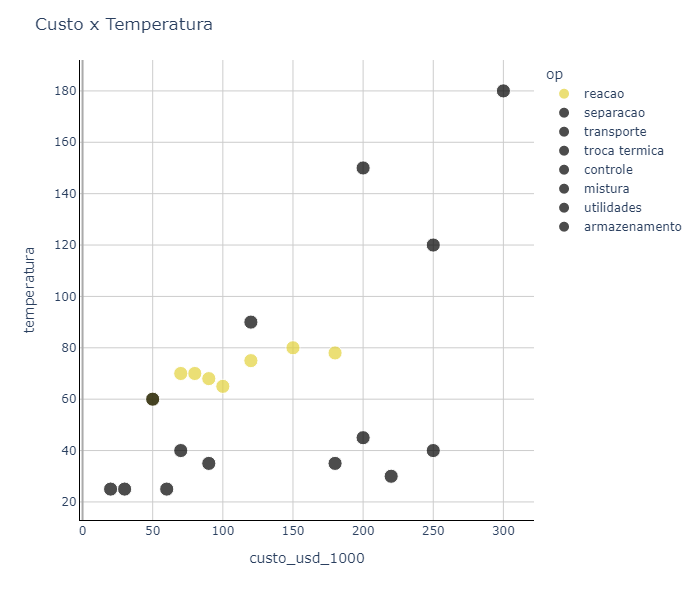

In [9]:
fig = px.scatter(
    equipamentos, x='custo_usd_1000', y='temperatura', 
    color='op', size_max=10, size=[1]*len(equipamentos),
    color_discrete_sequence=['#e3d23b']+['black']*9,
)

plotlymodex.main_layout(
    fig, x='custo_usd_1000', y='temperatura', title='Custo x Temperatura'
)

\newpage

# **Linhas**

Além de criar gráficos a partir de colunas de uma dataframe, também podemos criar gráficos a partir de linhas específicas. Isso é útil quando queremos destacar certos pontos ou categorias dentro dos dados.

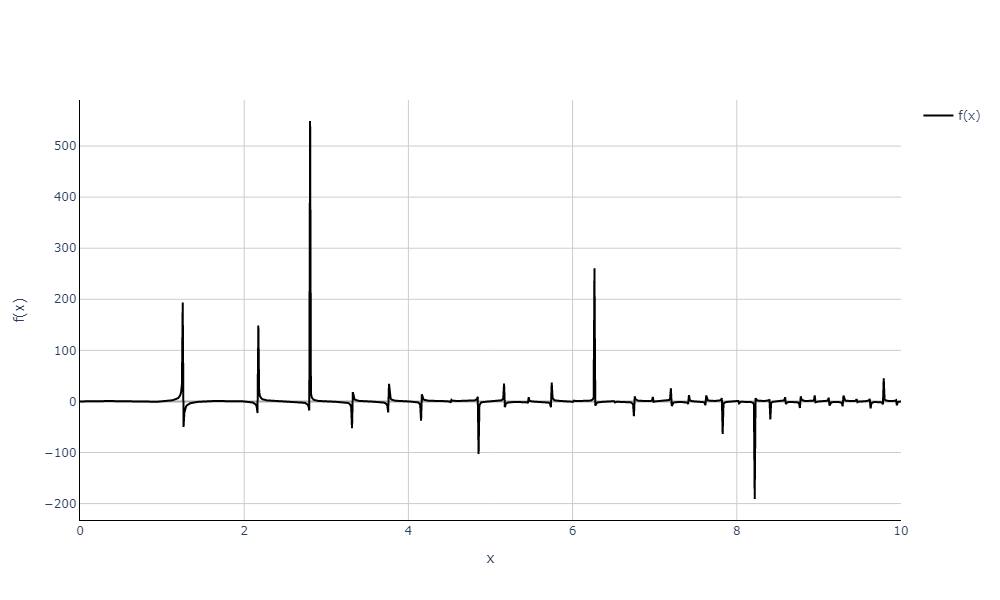

In [10]:
x = np.linspace(0, 10, 1000)
y = np.sin(2 * np.pi * x)/np.cos(x**2)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x, y=y, 
    mode='lines', name='f(x)',
    showlegend=True,
    line=dict(color='black', width=2)
))
plotlymodex.main_layout(
    fig, x='x', y='f(x)', 
    width=1000, height=600,
)

Alguns gráficos são mais rápidos e práticos de serem criados em bibliotecas que já possuem suporte para sua criação. Um exemplo é o gráfico de `stem(x, y)`, que pode ser criado facilmente com o `matplotlib` e é ideal para distribuições discretas, ou também em ocasiões específicas como para ACF e PACF em séries temporais.

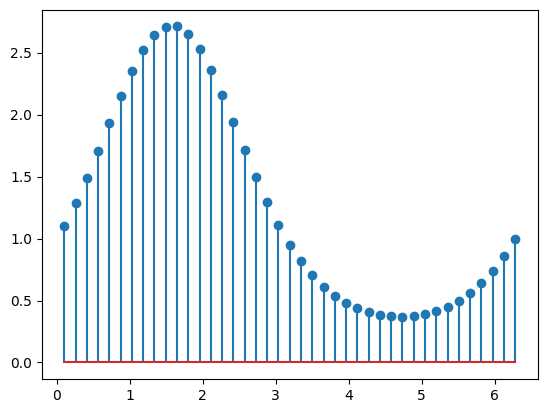

In [11]:
x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

plt.stem(x, y,);

\newpage

## Barras

Muitas das vezes, é necessário realizarmos o pivoteamento dos dados para conseguirmos criar gráficos de barras -- esse é o caso para o `plotly.go`.

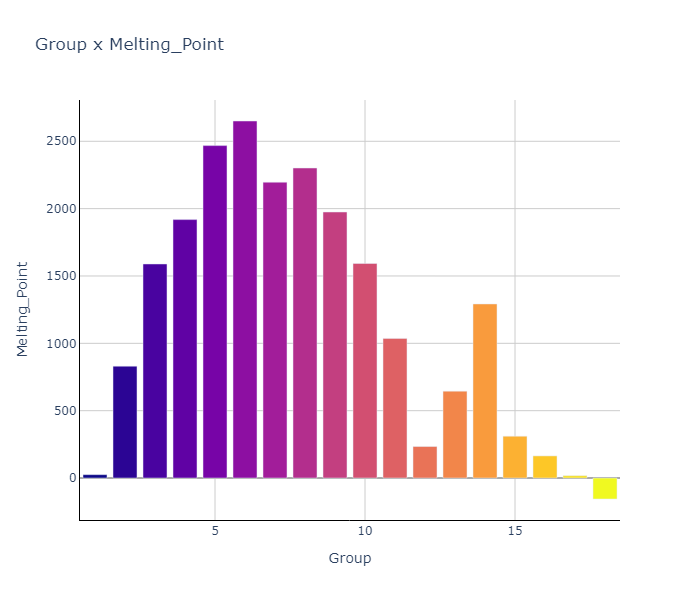

In [12]:
x = 'Group'
y = 'Melting_Point'

barra_df = tabela_periodica.groupby(x)[y].mean().sort_index()

fig_barra = go.Figure()

fig_barra.add_trace(go.Bar(
    x=barra_df.index, y=barra_df,
    showlegend=False,
    marker=dict(color=barra_df.index)
))

plotlymodex.main_layout(
    fig_barra, x=x, y=y, title=x+' x '+y,
)

Uma vantagem de bibliotecas de baixo nível é que a customização é maior, assim como a sobreposição de traços.

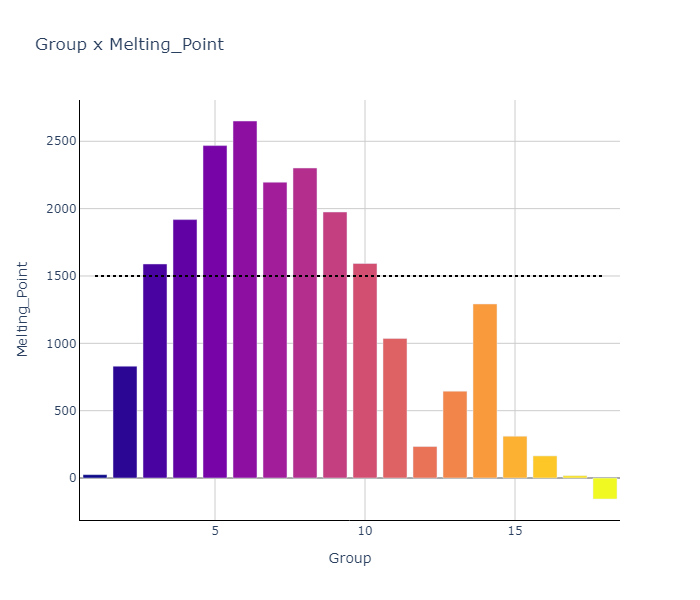

In [13]:
fig_barra.add_trace(go.Scatter(
    x=[1, 18], y=[1500, 1500],
    showlegend=False, mode='lines',
    line=dict(color='black', dash='dot')
))

O `px` permite colocar diretamente a dataframe e as colunasde interesse!

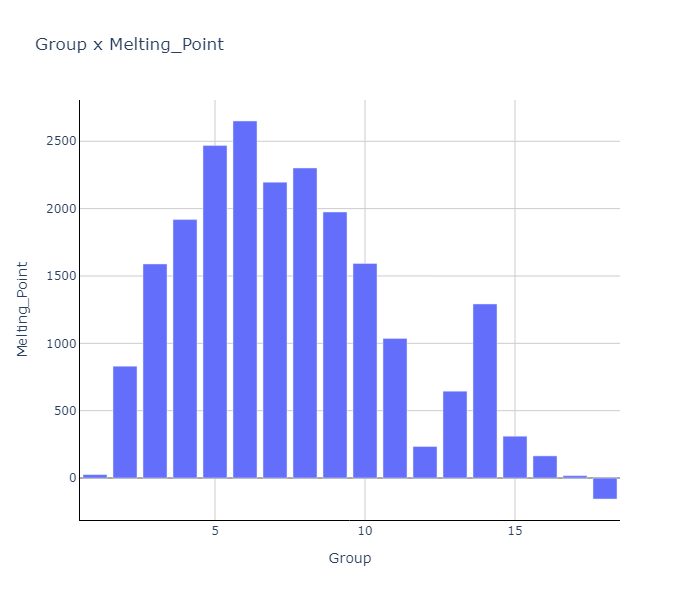

In [14]:
fig = px.bar(barra_df, y=y, title=x+' x '+y,)

plotlymodex.main_layout(
    fig, x=x, y=y, title=x+' x '+y,
)

O mesmo ocorre com o matplotlib.

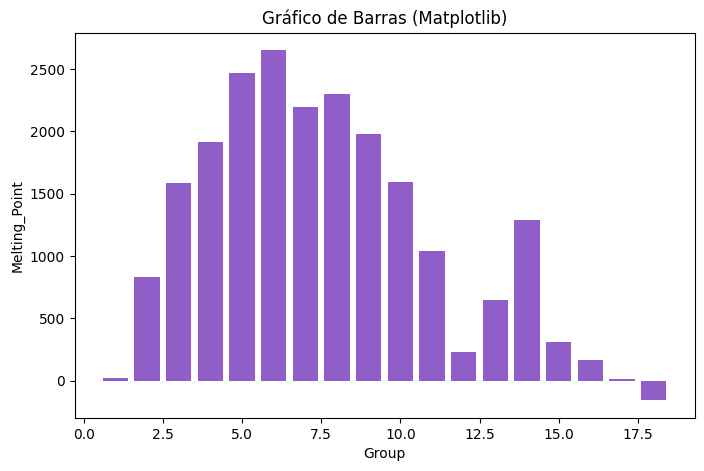

In [15]:
ax = plt.figure(figsize=(8, 5))
plt.bar(barra_df.index, barra_df.values, color="#7336bacc")

plt.xlabel(x)
plt.ylabel(y)
plt.title("Gráfico de Barras (Matplotlib)")
plt.show()

\newpage

## Boxplot

O boxplot é um dos gráficos mais importantes na estatística, uma vez que ele nos permite compreender a disperão dos dados, identificar outliers e comparar distribuições entre diferentes grupos. Ele opera com base no $\text{IQR}$. O $\text{IQR}$ é a diferença entre o terceiro quartil ($\text{Q}_3$) e o primeiro quartil ($\text{Q}_1$) dos dados, representando a faixa onde 50% dos valores centrais estão localizados.

Vemos abaixo que para criamos diferentes agrupamentos é necessário trabalharmos com laços de repetição!

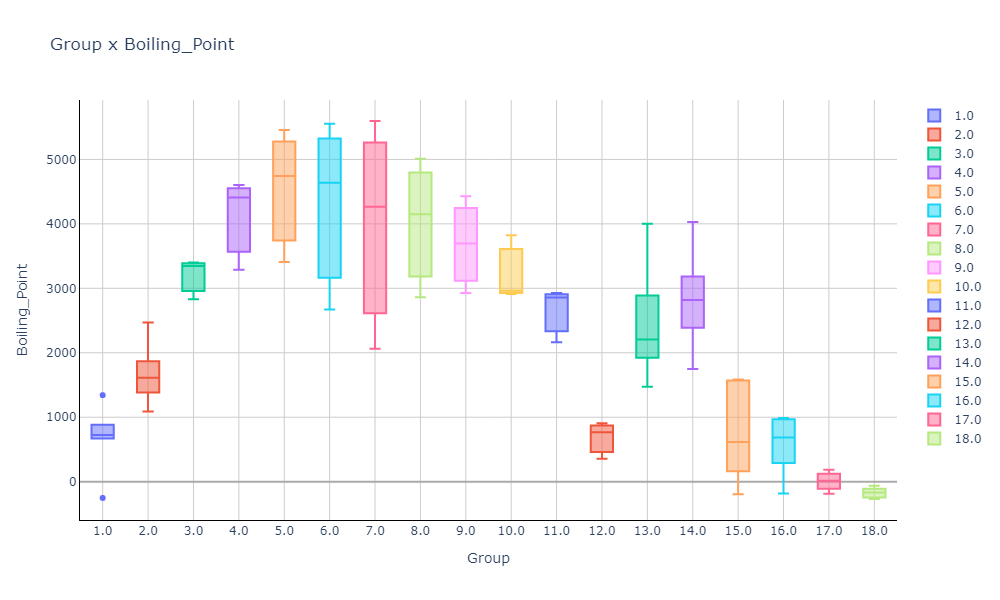

In [16]:
categorias = tabela_periodica.sort_values('Group')['Group'].unique()
y = 'Boiling_Point'

fig = go.Figure()

for cat in categorias:
    fig.add_trace(go.Box(
        y=tabela_periodica[tabela_periodica['Group'] == cat][y],
        name=cat
    ))

plotlymodex.main_layout(
    fig, x=x, y=y, title=x+' x '+y,
    width=1000
)

Com o `px` esse processo é mais fácil!

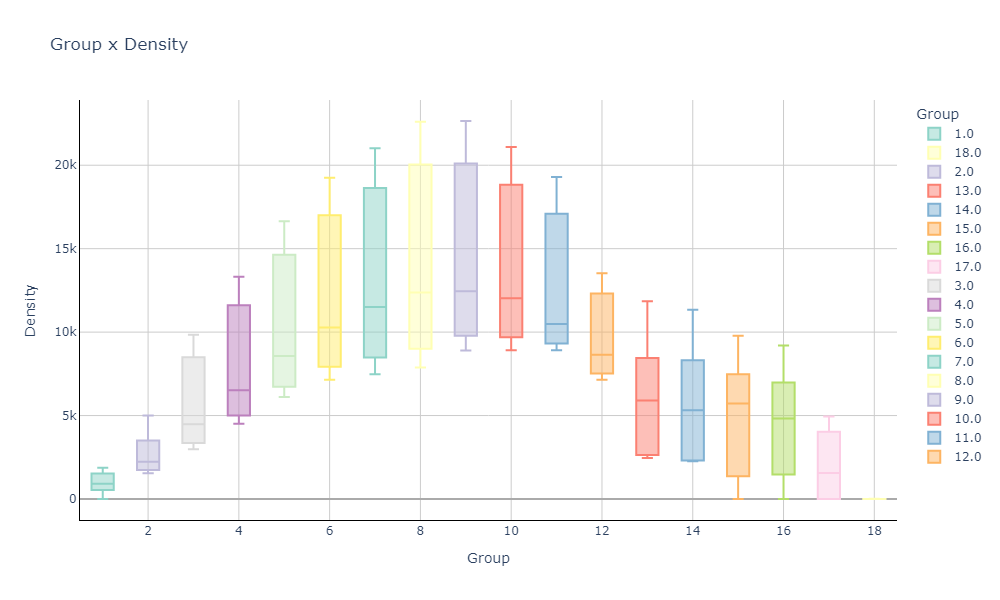

In [17]:
fig = px.box(
    tabela_periodica, x='Group', y='Density',
    title='Group x Density', width=1000, color='Group',
    color_discrete_sequence=px.colors.qualitative.Set3
)

plotlymodex.main_layout(
    fig, x='Group', y='Density', title='Group x Density',
    width=1000
)

O próprio `pandas` já possui essa função integrada na sua estrutura a partir do `matplotlib`

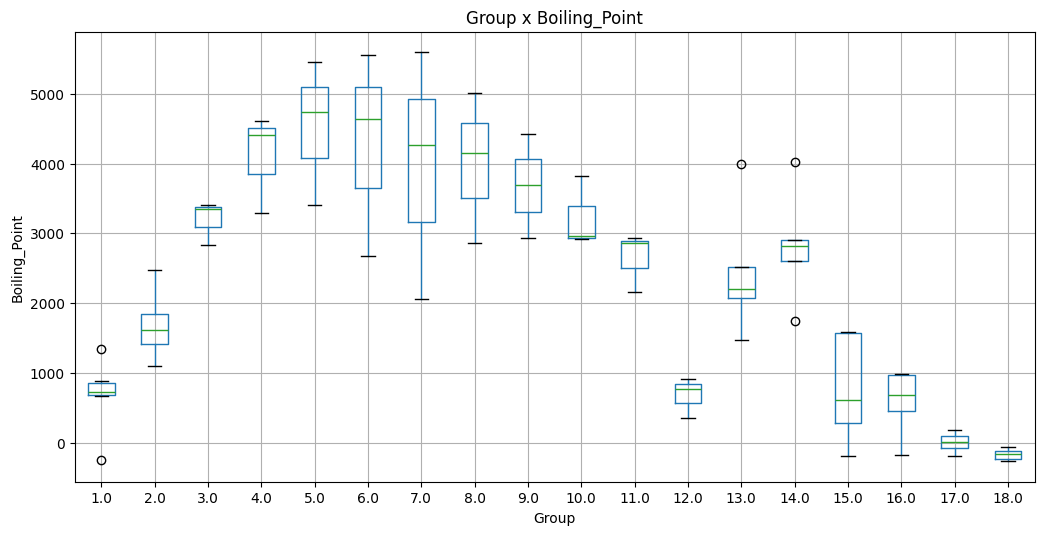

In [18]:
tabela_periodica.boxplot(
    column='Boiling_Point', by='Group', 
    grid=True, figsize=(12, 6)
)
plt.title('Group x Boiling_Point')
plt.suptitle('')  # remove título automático do pandas
plt.xlabel('Group')
plt.ylabel('Boiling_Point')
plt.show()

Mas também podemos fazer isso com o `seaborn`!

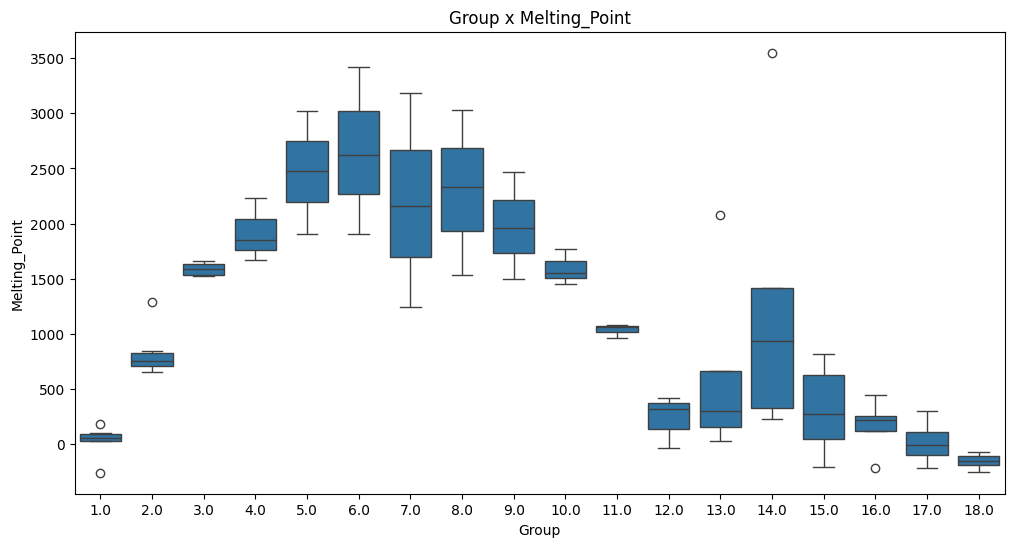

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=tabela_periodica, x='Group', y='Melting_Point')
plt.title('Group x Melting_Point')
plt.xlabel('Group')
plt.ylabel('Melting_Point')
plt.show()


\newpage

## Heatmap

Os mapas de calor (heatmaps) são ferramentas visuais poderosas para representar dados bidimensionais, onde os valores são representados por cores. Eles são amplamente utilizados em diversas áreas, como análise de dados, biologia, finanças e ciência de dados, para identificar padrões, correlações e tendências em grandes conjuntos de dados.lores são usados para indicar a intensidade ou magnitude dos valores em uma matriz ou tabela, facilitando a interpretação visual dos dados.

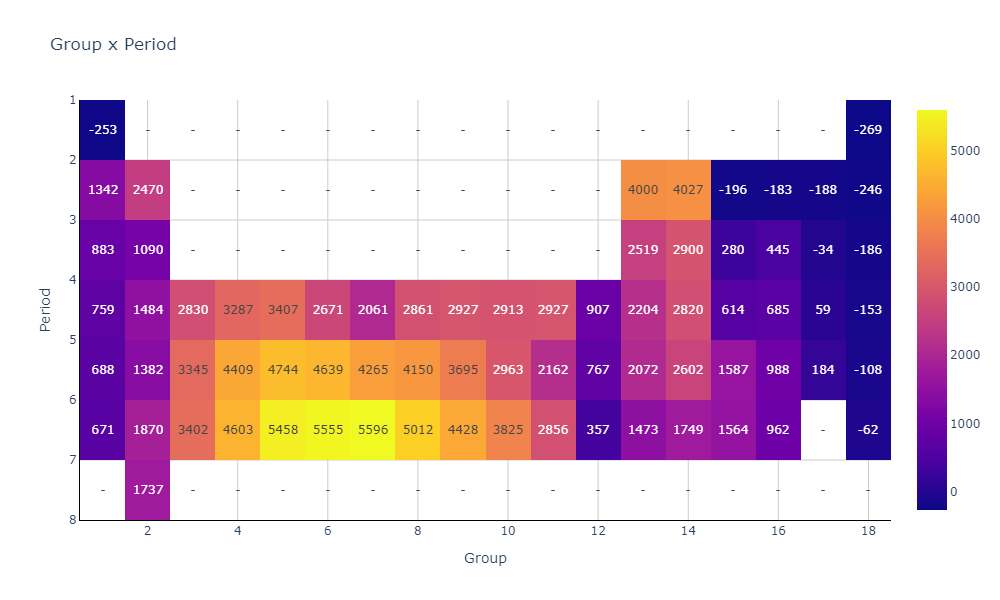

In [20]:
y = 'Boiling_Point'

heatmap_df = tabela_periodica.pivot_table(
    values=y,
    columns='Group',
    index='Period',
    aggfunc='first'
)

heatmap_df = heatmap_df.round(0).fillna('-')

fig = go.Figure()

fig.add_trace(go.Heatmap(
    z=heatmap_df,
    x=heatmap_df.index,
    y=heatmap_df.columns,
    text=heatmap_df.values,
    texttemplate="%{text}",   # <-- faz o texto aparecer
    textfont={"size": 12},    # opcional: tamanho da fonte
    colorscale="Plasma"      # opcional: paleta de cores
))

plotlymodex.main_layout(
    fig, x='Group', y='Period', title='Group x Period',
    width=1000
)

fig.update_yaxes(autorange='reversed')

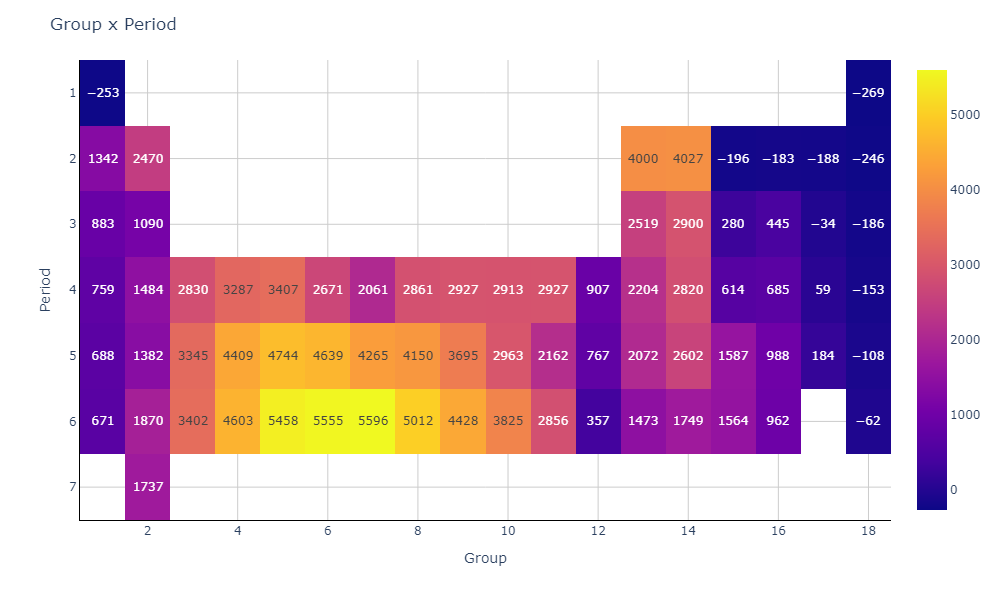

In [21]:
fig = px.imshow(
    heatmap_df,
    text_auto=True,             # mostra os valores automaticamente
    color_continuous_scale='Plasma',
    aspect='auto'               # evita distorções
)

fig.update_yaxes(autorange='reversed')
plotlymodex.main_layout(
    fig, x='Group', y='Period', title='Group x Period',
    width=1000
)

C:\Users\gustavo.filho\AppData\Local\Temp\ipykernel_1420\1888139016.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



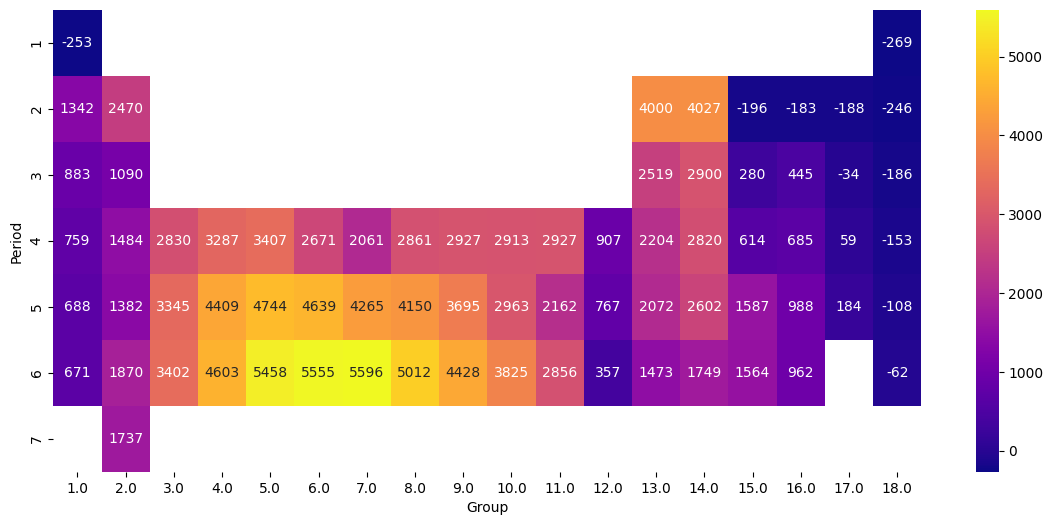

In [22]:
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_df.replace('-', np.nan), annot=True, 
    fmt=".0f", cmap="plasma",
);

\newpage

# **Distribuições Estatísticas**

Os gráficos de distribuição estatística são ferramentas visuais essenciais para compreender a dispersão, forma e características dos dados em um conjunto. Eles fornecem insights valiosos sobre a natureza dos dados, permitindo identificar padrões, tendências e anomalias. Alguns dos gráficos mais comuns para representar distribuições estatísticas incluem histogramas, gráficos de densidade (KDE), boxplots e violinos.

O `seaborn` é uma das melhores bibliotecas para criar esses gráficos, oferecendo uma variedade de opções e estilos visuais. Abaixo, exploramos alguns exemplos de gráficos de distribuição estatística usando o `seaborn`.

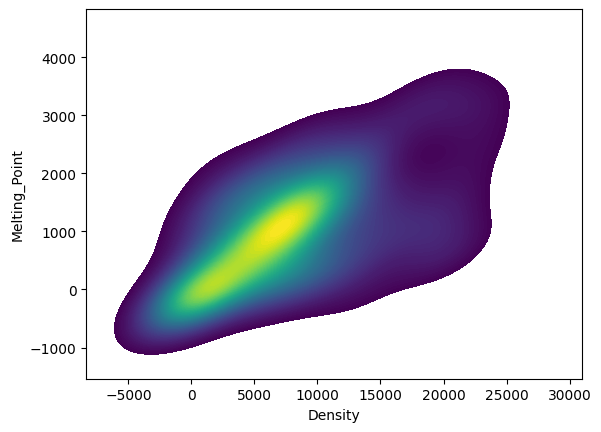

In [23]:
sns.kdeplot(
    data=tabela_periodica, x='Density', y='Melting_Point',
    fill=True, cmap='viridis', thresh=0.05, levels=100
);

Para visualizações tridimensionais, o `plotly` é a melhor opção!

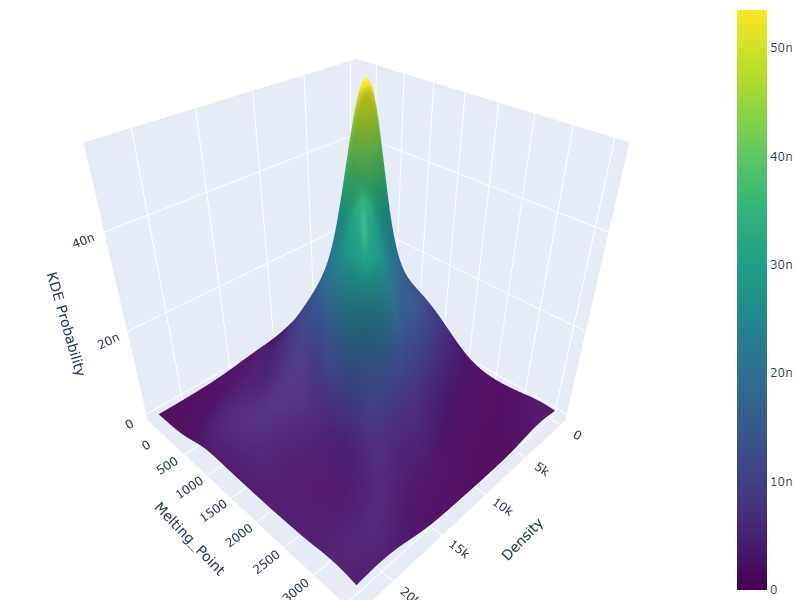

In [24]:
from scipy.stats import gaussian_kde

# Pegue os dados
x = tabela_periodica['Density'].fillna(10)
y = tabela_periodica['Melting_Point'].fillna(10)

# Calcular densidade (KDE) em 2D
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# Criar grid de valores
xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))

# Transformar em forma 2D para o gráfico
zi = zi.reshape(xi.shape)

# Criar gráfico 3D interativo
fig = go.Figure(data=[go.Surface(x=xi, y=yi, z=zi, colorscale='Viridis')])

plotlymodex.main_layout(fig)

fig.update_layout(
    scene=dict(
        xaxis_title='Density',
        yaxis_title='Melting_Point',
        zaxis_title='KDE Probability'
    ),
    margin=dict(l=0, r=0, b=0, t=0),  # Remove margens
    width=800,   # Opcional: ajusta largura
    height=600   # Opcional: ajusta altura
)

fig.show()

Podemos fazer uma análise univariada da distribuião e aplicar covariáveis para esse finalidade!

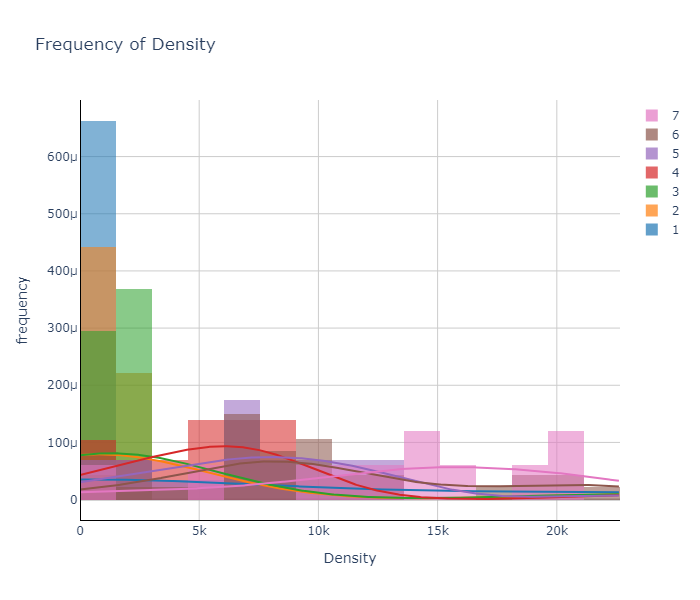

In [25]:
plotlymodex.frequency(
    tabela_periodica, x='Density', covariate='Period'
)

# **Gráficos Especiais**

Das mais diversas possibilidades do python, existem gráficos especiais que podem ser criados para análises específicas. Alguns exemplos incluem gráficos de radar, gráficos de rede, gráficos de séries temporais avançados e gráficos 3D interativos. Essas visualizações são particularmente úteis para destacar relações complexas entre múltiplas variáveis ou para representar dados em formatos não convencionais.

In [26]:
# Exemplo de dados — frações molares ou em porcentagem que somam 1 (ou 100%)
df = pd.DataFrame({
    'Agua': [0.7, 0.5, 0.3, 0.2, 0.1],
    'Etanol': [0.2, 0.3, 0.5, 0.6, 0.3],
    'Acetona': [0.1, 0.2, 0.2, 0.2, 0.6],
    'Temperatura (°C)': [25, 30, 35, 40, 45]  # variável opcional
})

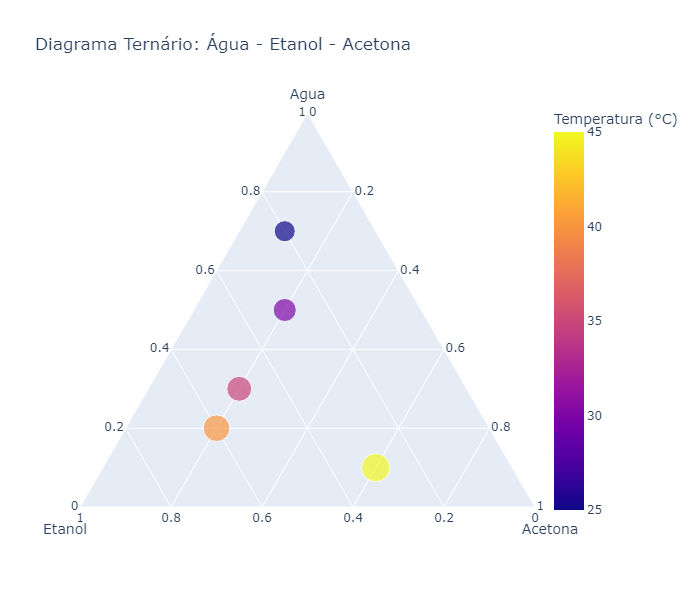

In [27]:
# Criar gráfico ternário
fig = px.scatter_ternary(
    df,
    a="Agua",
    b="Etanol",
    c="Acetona",
    color="Temperatura (°C)",
    size="Temperatura (°C)",
    hover_name="Temperatura (°C)",
    title="Diagrama Ternário: Água - Etanol - Acetona"
)

plotlymodex.main_layout(
    fig, title="Diagrama Ternário: Água - Etanol - Acetona"
)

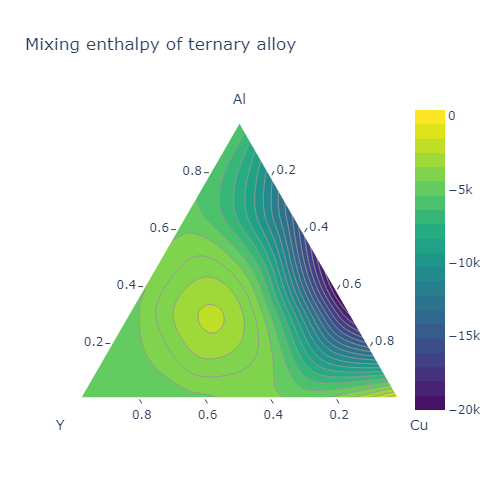

In [28]:
Al = np.array([0. , 0. , 0., 0., 1./3, 1./3, 1./3, 2./3, 2./3, 1.])
Cu = np.array([0., 1./3, 2./3, 1., 0., 1./3, 2./3, 0., 1./3, 0.])
Y = 1 - Al - Cu
# synthetic data for mixing enthalpy
# See https://pycalphad.org/docs/latest/examples/TernaryExamples.html
enthalpy = 2.e6 * (Al - 0.01) * Cu \
  * (Al - 0.52) * (Cu - 0.48) * (Y - 1)**2 - 5000
fig = ff.create_ternary_contour(np.array([Al, Y, Cu]), enthalpy,
                                pole_labels=['Al', 'Y', 'Cu'],
                                interp_mode='cartesian',
                                ncontours=20,
                                colorscale='Viridis',
                                showscale=True,
                                title=dict(
                                  text='Mixing enthalpy of ternary alloy'
                                ))
fig.show()